# 1. Import Necessary Libraries

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error,log_loss
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# 2. Read In and Explore the Data

In [124]:
#converting into dataframe
df_train = pd.read_csv('Data_Train.csv')
df_test = pd.read_csv('Test_Set.csv')

In [125]:
df_train.shape

(10683, 11)

In [126]:
df_test.shape

(2671, 10)

In [127]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [128]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [129]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [130]:
df_train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

### Imputing Missing Values with Medians

In [131]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [132]:
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [133]:
df_train['Route'].value_counts()

DEL ? BOM ? COK                      2376
BLR ? DEL                            1552
CCU ? BOM ? BLR                       979
CCU ? BLR                             724
BOM ? HYD                             621
                                     ... 
BOM ? GOI ? HYD                         1
BLR ? HBX ? BOM ? AMD ? DEL             1
BOM ? JAI ? DEL ? HYD                   1
BLR ? CCU ? BBI ? HYD ? VGA ? DEL       1
BOM ? RPR ? VTZ ? HYD                   1
Name: Route, Length: 128, dtype: int64

In [134]:
df_train=df_train.dropna(how='any',axis=0) 

In [135]:
df_train.shape

(10682, 11)

# 3. Exploratory Data Analysis Data Visualization

[Text(0, 0, 'IndiGo'),
 Text(0, 0, 'Air India'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'SpiceJet'),
 Text(0, 0, 'Multiple carriers'),
 Text(0, 0, 'GoAir'),
 Text(0, 0, 'Vistara'),
 Text(0, 0, 'Air Asia'),
 Text(0, 0, 'Vistara Premium economy'),
 Text(0, 0, 'Jet Airways Business'),
 Text(0, 0, 'Multiple carriers Premium economy'),
 Text(0, 0, 'Trujet')]

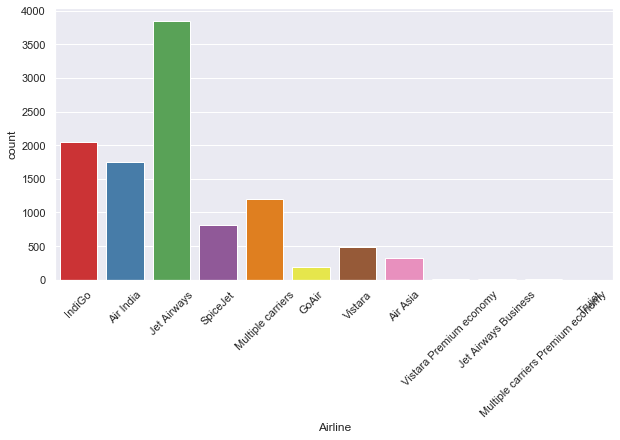

In [40]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df_train,
    x='Airline',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

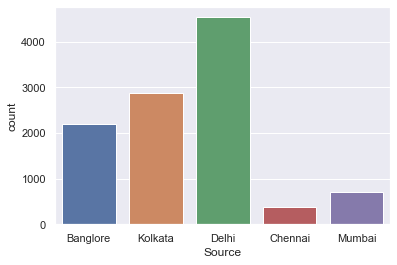

In [41]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Source", data=df_train)

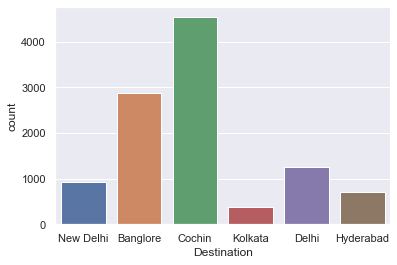

In [42]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Destination", data=df_train)

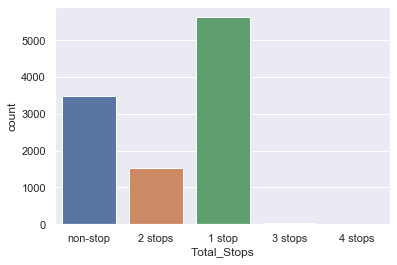

In [43]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Total_Stops", data=df_train)

[Text(0, 0, 'No info'),
 Text(0, 0, 'In-flight meal not included'),
 Text(0, 0, 'No check-in baggage included'),
 Text(0, 0, '1 Short layover'),
 Text(0, 0, 'No Info'),
 Text(0, 0, '1 Long layover'),
 Text(0, 0, 'Change airports'),
 Text(0, 0, 'Business class'),
 Text(0, 0, 'Red-eye flight'),
 Text(0, 0, '2 Long layover')]

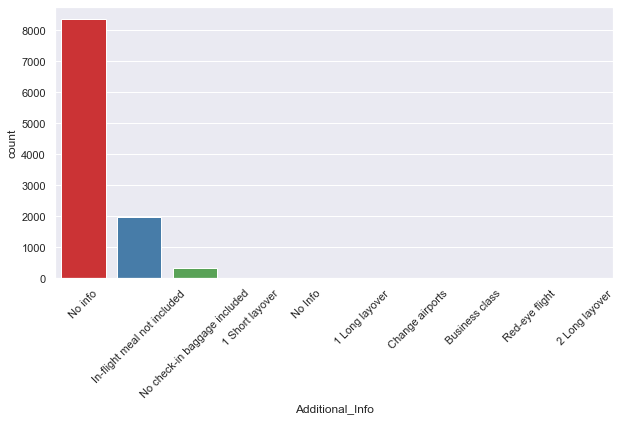

In [44]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df_train,
    x='Additional_Info',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

# 4. Data pre-processing and cleaning

## A. Cleaning data Manually

#### Other way to remove outliers is zscore but it needs all fetures to be numerical

## B.Converting all features to numerical features 

In [136]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

#### First we need to convert the string values to int so that we can apply the distance based models like KNN 

In [137]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_train['Airline']= label_encoder.fit_transform(df_train['Airline']) 
df_train['Date_of_Journey']= label_encoder.fit_transform(df_train['Date_of_Journey'])  
df_train['Source']= label_encoder.fit_transform(df_train['Source']) 
df_train['Destination']= label_encoder.fit_transform(df_train['Destination']) 
df_train['Route']= label_encoder.fit_transform(df_train['Route']) 
df_train['Dep_Time']= label_encoder.fit_transform(df_train['Dep_Time']) 
df_train['Arrival_Time']= label_encoder.fit_transform(df_train['Arrival_Time']) 
df_train['Duration']= label_encoder.fit_transform(df_train['Duration']) 
df_train['Total_Stops']= label_encoder.fit_transform(df_train['Total_Stops']) 
df_train['Additional_Info']= label_encoder.fit_transform(df_train['Additional_Info']) 

In [138]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_test['Airline']= label_encoder.fit_transform(df_test['Airline']) 
df_test['Date_of_Journey']= label_encoder.fit_transform(df_test['Date_of_Journey'])  
df_test['Source']= label_encoder.fit_transform(df_test['Source']) 
df_test['Destination']= label_encoder.fit_transform(df_test['Destination']) 
df_test['Route']= label_encoder.fit_transform(df_test['Route']) 
df_test['Dep_Time']= label_encoder.fit_transform(df_test['Dep_Time']) 
df_test['Arrival_Time']= label_encoder.fit_transform(df_test['Arrival_Time']) 
df_test['Duration']= label_encoder.fit_transform(df_test['Duration']) 
df_test['Total_Stops']= label_encoder.fit_transform(df_test['Total_Stops']) 
df_test['Additional_Info']= label_encoder.fit_transform(df_test['Additional_Info'])

## C.Removing Unwanted columns

## D.Removing outliers using standard methods

In [139]:
# If data has outliers then we can remove them by using zscore<br>
from scipy import stats
z=abs(stats.zscore(df_train))
print(np.where(z>3))
df_train=df_train[(z<3).all(axis=1)]

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
         826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
        1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
        2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
        2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
        3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
        4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
        5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
        6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
        7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
        8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
        8957,  8990,  9019,  9019,  9192,  9238,  9631,  9656,  9714,
        9973, 10051, 10112, 10159, 10181, 10188, 10352, 10363, 10363,
       10382, 10438, 10510, 10510], dtype=int64), array([10, 10, 10, 10, 10, 10, 10,  9, 

### E .Train_test Split

In [120]:
from sklearn.preprocessing import Normalizer
feature_scaler = Normalizer()
df_train = feature_scaler.fit_transform(df_train)

In [121]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
df_train = feature_scaler.fit_transform(df_train)

In [140]:
y=df_train['Price']
x=df_train.drop(['Price'],axis=1)

In [103]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10577, dtype: int64

In [141]:
X_train, X_cv, y_train, y_cv = train_test_split(x, y, test_size=0.33, random_state=42)

In [142]:
X_test=df_test

In [143]:
round(X_train, 2)
round(X_cv, 2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
1300,6,7,2,1,104,66,1217,24,0,8
7066,3,17,0,2,18,107,982,240,4,8
9281,4,33,4,3,48,12,399,120,4,5
5383,2,29,2,1,98,50,921,321,0,8
1410,3,26,3,0,64,123,1014,236,4,8
...,...,...,...,...,...,...,...,...,...,...
2290,6,14,2,1,111,128,1260,338,0,8
2274,1,24,3,0,73,190,628,28,0,8
844,1,26,4,3,48,178,1206,118,4,8
8959,8,20,3,0,64,154,1155,236,4,8


In [144]:
from sklearn.preprocessing import Normalizer
feature_scaler = Normalizer()
X_train = feature_scaler.fit_transform(X_train)
X_cv = feature_scaler.transform(X_cv)

In [145]:
X_cv.shape

(3491, 10)

In [157]:
from sklearn.preprocessing import Normalizer
feature_scaler = Normalizer()
X_test = feature_scaler.fit_transform(X_test)


# 5. Building Models

# Model1 : KNN

In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()

parameters = {'n_neighbors': range(1,100,10)}

clf = GridSearchCV(neigh, parameters, cv= 5)

clf.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 100, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [147]:
clf.best_params_

{'n_neighbors': 11}

In [148]:
#KNN classifier sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

neigh = KNeighborsRegressor(n_neighbors=11)
neigh.fit(X_train, y_train)

y_cv_pred = neigh.predict(X_cv)
print(r2_score(y_cv,y_cv_pred))


0.609392874508061


In [158]:
y_test_pred = neigh.predict(X_test)

In [161]:
y_test_pred

array([ 9378.54545455,  6798.63636364, 12603.        , ...,
        3921.45454545, 11337.90909091, 11754.72727273])

In [160]:
np.median(y_test_pred)

9290.90909090909

Average predicted flight price 9290.

# Model 3 : Linear regression 

In [50]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train, y_train)

y_cv_pred = Lr.predict(X_cv)

print(r2_score(y_cv,y_cv_pred))

0.3594188190968016


In [162]:
y_test_pred = Lr.predict(X_test)

In [163]:
y_test_pred

array([14462.23713753, 10355.55584762,  9821.25072297, ...,
       12292.41081024, 10650.79631801, 10539.59549315])

# Model 4 : SVM

In [52]:
from sklearn.svm import SVR

parameters = [{'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}]   #'poly','sigmoid' takes too much time

model = GridSearchCV(SVR(),parameters, cv=5)
model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.10081105710858873


In [53]:
model.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [64]:
from tqdm import tqdm
from sklearn.model_selection import cross_val_score

C= [10**-4, 10**-2, 10**0, 10**2, 10**4]
k_scores = []

for k in tqdm(C):
    #
    svm = SVR(C=k,gamma= 1,kernel='rbf')
    
    scores = cross_val_score(svm,X_train, y_train, cv=10)
    
    k_scores.append(scores.mean())
print(k_scores)

100%|██████████| 5/5 [02:02<00:00, 24.43s/it]


[-0.020510679662125497, -0.020446511974758174, -0.015505382366291509, 0.079773651314705, 0.1524508933173802]


In [66]:
import math as mt
log_C=[]
for i in C:
     log_C.append(mt.log10(i))

Text(0, 0.5, 'Cross-Validated Accuracy')

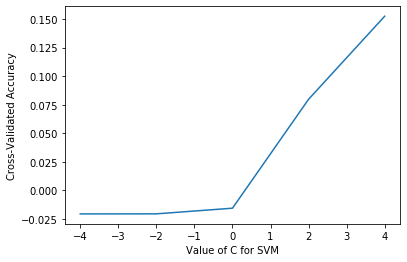

In [67]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(log_C, k_scores)
plt.xlabel('Value of C for SVM')
plt.ylabel('Cross-Validated Accuracy')

In [54]:
from sklearn.svm import SVR

clf = SVR(C=1000,gamma=1,kernel= 'rbf')

clf.fit(X_train, y_train)

y_cv_pred = clf.predict(X_cv)

print(r2_score(y_cv,y_cv_pred))

0.09992790162577614


In [164]:
y_test_pred = clf.predict(X_test)
y_test_pred

array([ 9378.54545455,  6798.63636364, 12603.        , ...,
        3921.45454545, 11337.90909091, 11754.72727273])

# Model 5 : Decision Tree

In [55]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


parameters = {'max_depth': [5, 10, 50, 100]}

clf = DecisionTreeRegressor(criterion='mse')

model = GridSearchCV(clf,parameters,cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
0.8355410047468939


In [56]:
model.best_params_

{'max_depth': 10}

In [114]:
from sklearn.model_selection import cross_val_score

max_depth= [1,5,15,25,50]
k_scores = []

for k in max_depth:
    #
    DT = DecisionTreeRegressor(max_depth=k,criterion='mse', min_samples_split=100)
    
    scores = cross_val_score(DT,X_train, y_train, cv=10)
    
    k_scores.append(scores.mean())
print(k_scores)

[0.4274448264037634, 0.5846090987461676, 0.7218719826038575, 0.7229003344077832, 0.7229511732681729]


Text(0, 0.5, 'Cross-Validated Accuracy')

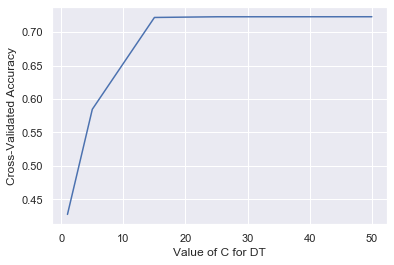

In [115]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(max_depth, k_scores)
plt.xlabel('Value of C for DT')
plt.ylabel('Cross-Validated Accuracy')

# Traning with best hyperparameters

In [165]:
clf = DecisionTreeRegressor(criterion='mse',max_depth=10,min_samples_split=2)

clf.fit(X_train, y_train)


y_cv_pred = clf.predict(X_cv)

print(r2_score(y_cv,y_cv_pred))

0.7492956722545332


In [166]:
y_test_pred = clf.predict(X_test)
y_test_pred

array([ 6315.8       , 14693.03225806, 10638.41129032, ...,
       14693.03225806,  8071.52666667, 10638.41129032])

# Model 6 : Ensemble Techniques 

## A. Bagging

In [58]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}
RF = RandomForestRegressor( criterion='mse')

model = GridSearchCV(RF,parameters, cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)
print(model.score(X_train, y_train))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
0.974040549789331


In [60]:
from sklearn.model_selection import GridSearchCV

RF=RandomForestRegressor(max_depth=50,n_estimators=100,criterion='mse' )
RF.fit(X_train, y_train)

y_cv_pred = RF.predict(X_cv)

print(r2_score(y_cv,y_cv_pred))

0.827150542028712


In [167]:
y_test_pred = RF.predict(X_test)
y_test_pred

array([ 8004.32 ,  9719.095, 10461.88 , ...,  9813.39 , 11116.12 ,
       10109.17 ])

# Boosting

In [61]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


parameters = {'max_depth': [5, 10, 50, 100],'n_estimators':[10, 20 , 50, 100]}

clf = GradientBoostingRegressor()

model = GridSearchCV(clf,parameters, cv=3)

model.fit(X_train, y_train)    

print(model.best_estimator_)



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [62]:
from sklearn.model_selection import GridSearchCV

clf=GradientBoostingRegressor(max_depth=10,n_estimators=100)
clf.fit(X_train, y_train)

y_cv_pred = clf.predict(X_cv)

print(r2_score(y_cv,y_cv_pred))

0.8309453821229661


In [168]:
y_test_pred = clf.predict(X_test)
y_test_pred

array([ 6315.8       , 14693.03225806, 10638.41129032, ...,
       14693.03225806,  8071.52666667, 10638.41129032])

## Note: As we have very less data stascking is not advisable 

# Xgboost

In [63]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)

xgb_model.fit(X_train, y_train)

y_cv_pred = xgb_model.predict(X_cv)

print(r2_score(y_cv,y_cv_pred))



[23:24:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.7231189370106481


In [169]:
y_test_pred = xgb_model.predict(X_test)
y_test_pred

array([ 9657.39  ,  9729.19  ,  8469.763 , ..., 10935.208 ,  7686.1475,
        9693.615 ], dtype=float32)

# 6.Model Comparison

In [69]:
#https://stackoverflow.com/questions/18601688/python-prettytable-example

from prettytable import PrettyTable
table = PrettyTable()

#setting column names
table.field_names = [ "Model", "r2_score"]

#setting row values
table.add_row(["KNN", '0.6093' ])
table.add_row(["Linear Regression" ,'0.3594' ])
table.add_row(["SVM", '0.0999' ])
table.add_row(["Decision Tree",'0.7508' ])
table.add_row(["RandomForest",'0.8271' ])
table.add_row(["GBDT" ,'0.8309' ])
table.add_row(["Xgboost",'0.7231' ])
table.add_row(["Stacking",'0.7231' ])
print(table)

+-------------------+----------+
|       Model       | r2_score |
+-------------------+----------+
|        KNN        |  0.6093  |
| Linear Regression |  0.3594  |
|        SVM        |  0.0999  |
|   Decision Tree   |  0.7508  |
|    RandomForest   |  0.8271  |
|        GBDT       |  0.8309  |
|      Xgboost      |  0.7231  |
|      Stacking     |  0.7231  |
+-------------------+----------+


Summary:<br>
1.GBDT is the best model amongst all with r2score  of 0.8390<br>

# 7.Creating Submission File

In [71]:
best_model=clf
from sklearn.externals import joblib
filename = 'finalized_model.sav'
joblib.dump(best_model, filename)

['finalized_model.sav']